In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
Categories=['diseased','healthy']
flat_data_arr=[]
target_arr=[]
datadir=r'Dataset'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target

loading... category : diseased
loaded category:diseased successfully
loading... category : healthy
loaded category:healthy successfully


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.451265,0.392442,0.404206,0.512944,0.454121,0.465885,0.509329,0.450506,0.462270,0.456713,...,0.634954,0.583973,0.619267,0.654881,0.603900,0.639194,0.668185,0.617204,0.652498,0
1,0.559718,0.504816,0.595013,0.568244,0.513342,0.603538,0.554359,0.499457,0.589653,0.541150,...,0.573664,0.514840,0.597193,0.603432,0.544608,0.626961,0.531690,0.472867,0.555219,0
2,0.636321,0.616714,0.644164,0.654312,0.634704,0.662155,0.663516,0.643908,0.671359,0.655145,...,0.511473,0.491865,0.515395,0.499139,0.479531,0.503060,0.511955,0.492348,0.515877,0
3,0.557081,0.517866,0.513944,0.578673,0.539458,0.535536,0.559432,0.520216,0.516294,0.591690,...,0.805509,0.797666,0.809430,0.800146,0.792303,0.804068,0.803967,0.796124,0.807889,0
4,0.418929,0.450317,0.158076,0.345187,0.384259,0.088355,0.547142,0.593475,0.309856,0.387391,...,0.514664,0.495056,0.518585,0.513358,0.493750,0.517279,0.512309,0.492701,0.516230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.574103,0.487828,0.495672,0.565494,0.479219,0.487062,0.620446,0.534171,0.542015,0.590288,...,0.653823,0.571470,0.598921,0.619113,0.536760,0.564211,0.691237,0.608884,0.636335,1
3329,0.242562,0.219032,0.266091,0.259833,0.236303,0.283362,0.240486,0.216957,0.264015,0.258942,...,0.668359,0.586006,0.613457,0.673708,0.591355,0.618806,0.648646,0.566293,0.593744,1
3330,0.579606,0.512939,0.536469,0.562974,0.496308,0.519837,0.573771,0.507105,0.530634,0.557441,...,0.630638,0.571815,0.591422,0.665765,0.606945,0.626553,0.687746,0.629012,0.648619,1
3331,0.722980,0.660235,0.699450,0.717544,0.654799,0.694015,0.706278,0.643533,0.682748,0.735733,...,0.521700,0.439347,0.466798,0.522400,0.440048,0.467499,0.545584,0.463231,0.490682,1


In [4]:
# get the locations
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardizing the features
x = StandardScaler().fit_transform(x)

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [5]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)

In [6]:
pca.fit(x_train,y_train)

PCA(n_components=0.95)

In [7]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [8]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['linear']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
model.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}

In [9]:
y_pred=model.predict(x_test)

In [10]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [11]:
np.array(y_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [12]:
print(f" model accuracy is : {accuracy_score(y_pred,y_test)*100}% ")

 model accuracy is : 81.70914542728636% 


In [15]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle dumped successfully")

Pickle dumped successfully


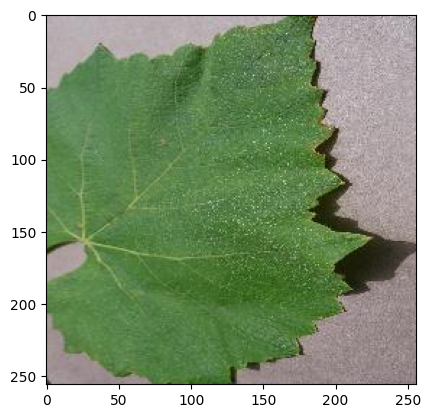

ValueError: X has 67500 features, but PCA is expecting 1037 features as input.

In [30]:
model=pickle.load(open('img_model.p','rb'))
url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()

flat_data_arr2=[]
target_arr2=[]
img_array=img
img_resized=resize(img_array,(150,150,3))
flat_data_arr2.append(img_resized.flatten())

flat_data2=np.array(flat_data_arr2)
df2=pd.DataFrame(flat_data2)

x2 = df2.iloc[:, :]
l = pca.transform(x2)

probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
    print("What is the image?")
    for i in range(len(Categories)):
        print(f"Enter {i} for {Categories[i]}")
    k=int(input())
    while(k<0 or k>=len(Categories)):
        print(f"Please enter a valid number between 0-{len(Categories)-1}")
        k=int(input())
    print("Please wait for a while for the model to learn from this image :)")
    flat_arr=flat_data_arr.copy()
    tar_arr=target_arr.copy()
    tar_arr.append(k)
    flat_arr.extend(l)
    tar_arr=np.array(tar_arr)
    flat_df=np.array(flat_arr)
    df1=pd.DataFrame(flat_df)
    df1['Target']=tar_arr
    model1=GridSearchCV(svc,param_grid)
    x1 = df1.iloc[:, :-1]
    y1 = df1.iloc[:, -1]
    x1 = StandardScaler().fit_transform(x1)
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42, stratify = y1)
    pca.fit(x_train1,y_train1)
    x_train1 = pca.transform(x_train1)
    x_test1 = pca.transform(x_test1)
    d={}
    for i in model.best_params_:
        d[i]=[model.best_params_[i]]
    model1=GridSearchCV(svc,d)
    model1.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
    pickle.dump(model1,open('img_model.p','wb'))

In [32]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import ImageTk, Image
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load the trained model and PCA model
model = pickle.load(open('img_model.p', 'rb'))
pca = PCA(.95)  # Assuming PCA was fitted with .95 variance

Categories = ['diseased', 'healthy']

def predict_image():
    global image_path
    try:
        if not image_path:
            messagebox.showerror("Error", "Please select an image first.")
            return

        img = imread(image_path)
        img_resized = resize(img, (150, 150, 3))
        flat_data_arr2 = [img_resized.flatten()]
        flat_data2 = np.array(flat_data_arr2)
        df2 = pd.DataFrame(flat_data2)
        x2 = df2.iloc[:, :]

        # Transform using the loaded PCA model
        pca.fit(x2)
        l = pca.transform(x2)

        probability = model.predict_proba(l)
        prediction_label = Categories[model.predict(l)[0]]

        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, f"Prediction: {prediction_label}\n")
        for ind, val in enumerate(Categories):
            result_text.insert(tk.END, f"{val} = {probability[0][ind] * 100:.2f}%\n")

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")


def browse_image():
    global image_path
    image_path = filedialog.askopenfilename(
        initialdir="/", title="Select Image", filetypes=(("Image Files", "*.jpg *.png *.jpeg"),)
    )
    if image_path:
        try:
            img = Image.open(image_path)
            img = img.resize((200, 200))
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img  # Keep a reference to prevent garbage collection
        except Exception as e:
            messagebox.showerror("Error", f"Could not open image: {e}")


# Create main window
root = tk.Tk()
root.title("Image Classifier")

# Create widgets
browse_button = tk.Button(root, text="Browse Image", command=browse_image)
predict_button = tk.Button(root, text="Predict", command=predict_image)
image_label = tk.Label(root)
result_text = tk.Text(root, height=10, width=30)

# Place widgets in the window
browse_button.pack(pady=10)
image_label.pack()
predict_button.pack(pady=10)
result_text.pack()

image_path = None

root.mainloop()

c:\Users\kusha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:557: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
